In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# pandas
<div>
<img src="Data/images/squat.png.jpg" width="500"/>
</div>

# NumPy
<div>
<img src="Data/images/bench.jpg" width="500"/>
</div>

# scikit-learn
<div>
<img src="Data/images/deadlift.jpg" width="500"/>
</div>

## Problem #1
I will get my data from OpenPowerliting.org, the largest public data provider for powerlifting information. This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.
You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data.
<br><br>
The first decision I had to make was between these two data sets.
<div>
<img src="Data/images/img1.jpg" width="800"/>
</div> <br>
One dataset obviously has more data, which will work better via ideas like the CLT. The more data we have, the better estimates and analyses we make.
However, it is a little suspicious because the larger data set is just all powerlifting data. This means anything even remotely considered as a competition will have data here. This means casual and random events that may not be taken too seriously could skew our data.
For the reason of formality and seriousness, I will choose the smaller dataset that is data from events that comply with the International Powerlifting Federation.

## There's another problem 💊💉
Steroid use will inevitably skew our data. The binary feature of whether or not a lifter is on the juice has more impact than any other. In an ideal world, I would love to use a column named "steroids" and have a 1 or a 0. Going deeper, when the athlete used steroids also comes into play, so it's not just a simple binary classification. With all of these issues, we would love to be able to just throw steroids out of the equation.
<br><br>
The best way to do so is to use the data from the IPF, which supposedly prohibits the use of steroids.<br><br>
https://www.powerlifting.sport/anti-doping/ipf-anti-doping-rules<br><br>
But any lifter knows that it is extremely difficult to tell if someone is on steroids or not. What if the tests gave a false result? What if they are just really strong? What if they only took a little bit years ago?<br><br>
In the world of bodybuilding, powerlifting, etc., it is basically impossible to rule out the use of steroids. The best way to make a prediction model to find if someone is on steroids is to have heaps of data with athletes we know are on the drugs, and the same amount of known natty's (natural lifters). But this is incredibly difficult, as each individual would require a lot of care and attention in just the question "Do you take steroids?" alone. People will lie, accidentally give false information, etc.

## The IPF is Good Enough
Why? Well first of all, yes steroids are an issue. But the intended purpose of this analysis is for future IPF lifters. If historical data holds, the proportion of drug use in new data will be similar to that of the data we have now. It's not like we are trying to extrapolate our data to only natural lifters. We are analyzing powerlifters FOR powerlifters. They will continue to use these steroids anyways.
<br><br>
But regardless, by choosing the IPF dataset, we remove steroid usage as a variable as much as we can.
<br><br>

https://www.powerliftingwatch.com/node/10795 <br>
"26% of the lifters who were tested at the 2008 Masters World Championships testing positive for banned substances."
<br>
It's not perfect, but at least IPF tries to limit drug usage, which is not something that could be said about the larger data set that allows data from any unorganized powerlifting events.

<br><br>
I literally looked at the FIRST entry in the larger dataset.
<div>
<img src="Data/images/img2.jpg" width="300"/>
</div>
This lifter (Marianna Gasparyan) is clearly dedicated and has put in years of effort into their realm. Their work is definitely impressive and valid. Lifters should be inspired by this person. But they are clearly using steroids. Not that juicing discredits their efforts, it just skews our data in this context.
<br><br>
How many 30 year old females do you know that can bench press 300 pounds?

In [2]:
df = pd.read_csv("data/openipf-2023-03-25-0091d233.csv") # Load the data
df.head(10)

C:\Users\cderm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
1,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,Open,50.64,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
2,Renee Orbon,F,SBD,Single-ply,31.5,24-34,24-39,Open,55.76,56,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
3,Rikki Flanders,F,SBD,Single-ply,31.5,24-34,24-39,Open,56.42,60,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4,Julie Hallmond,F,SBD,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
5,Vahinerii Buchin,F,SBD,Single-ply,NaN,NaN,NaN,Sub-Juniors,59.58,60,...,Yes,Tahiti,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
6,Maroof Ramzan,M,SBD,Single-ply,NaN,NaN,NaN,Open,54.00,56,...,Yes,Fiji,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
7,Iliame Vereubia,M,SBD,Single-ply,NaN,NaN,NaN,Open,59.84,60,...,Yes,Fiji,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
8,Dean Rask,M,SBD,Single-ply,NaN,NaN,40-49,Masters 1,67.02,67.5,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
9,Tony Feltham,M,SBD,Single-ply,NaN,NaN,60-69,Masters 3,64.90,67.5,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [3]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

### That's alot of information!
We have a lot of info here, but we still haven't decided on a question. Let's go ahead and do that.
<br><br>
Given new information about some powerlifter, predict their Squat, Bench, and Deadlift 1-rep max.

## 🎉Feature Engineering🎉
Let's go through the data and keep only the useful information.
<br><br>
Most importantly and most interestingly is how much each competitor was able to lift. The data has a column for 4 attempts at each lift for each athlete. Most commonly, lifters do not do a 4th attempt. Even if they do, it won't be considered in their "Best Lift" for that category. But what if the 4th lift was better? Our main goal is to predict how strong a new lifter will be. So, we probably should consider a lifter's 4th attempt if it was stronger than their official best.

In [4]:
# we only want lifters that competed in all three of squat, bench, and deadlift
k = df[df['Event']=="SBD"].drop(columns=['Event'])

# We don't need the first 3 attempts for each lift anymore
k = k.drop(columns=['Squat1Kg','Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg',
               'Deadlift1Kg','Deadlift2Kg','Deadlift3Kg',])

# Take each lifter's best as the max of their official best and 4th attempt
# This will just be the highest number they pushed on that day (for each lift)
k['BestSquatKg'] = df[["Squat4Kg", "Best3SquatKg"]].max(axis=1)
k['BestBenchKg'] = df[["Bench4Kg", "Best3BenchKg"]].max(axis=1)
k['BestDLKg'] = df[["Deadlift4Kg", "Best3DeadliftKg"]].max(axis=1)

# We don't need the old official best or 4th attempt anymore
k = k.drop(columns=["Squat4Kg","Bench4Kg","Deadlift4Kg","Best3SquatKg","Best3BenchKg","Best3DeadliftKg"])

display(k)

,Name,Sex,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,TotalKg,...,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,BestSquatKg,BestBenchKg,BestDLKg
0,Karen Thomson,F,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,312.5,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,110.5,72.5,130.0
1,Deborah Groves,F,Single-ply,30.5,24-34,24-39,Open,50.64,52,370.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,127.5,90.0,152.5
2,Renee Orbon,F,Single-ply,31.5,24-34,24-39,Open,55.76,56,340.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,115.0,87.5,137.5
3,Rikki Flanders,F,Single-ply,31.5,24-34,24-39,Open,56.42,60,320.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,117.5,62.5,140.0
4,Julie Hallmond,F,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,316.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159193,Inna Orobets,F,Single-ply,45.0,45-49,40-49,Open,109.30,84+,645.0,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,242.5,187.5,215.0
1159194,Ágnes Szabó,F,Single-ply,27.5,24-34,24-39,Open,113.22,84+,632.5,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,237.5,195.0,200.0
1159195,Brenda van der Meulen,F,Single-ply,37.5,35-39,24-39,Open,110.79,84+,617.5,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,227.5,200.0,190.0
1159196,Kelly Phasey,F,Single-ply,39.5,35-39,40-49,Open,124.53,84+,515.0,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,220.0,150.0,145.0


## Oops
I kind of skipped a step out of excitement for the first feature. We just need to get rid of information we dont need for this analysis.
<br><br>
Columns to delete: <br><br>
AgeClass: <br>This information is captured by Age, which itself gives more information. We don't need this column. <br><br>
BirthYearClass: <br>Same as above. <br><br>
Division: <br>Yes this could be important, but it gives no new inofrmation compared to other columns. Also, there are simply too many divisions to perform sensible classification analysis on. <br><br>
WeightClassKg: <br>Again, this is useful, but is captured in more detail by the weight feature itself.<br><br>
TotalKg: <br>How much they lifted in total. Very useful, but we will not have this in a prediction problem, because this is what we are predicting!<br><br>
Place: <br>The placement of the lifter in their competition. VERY COOL! But we don't care. <br><br>
Dots, Wilks, Glossbrenner, Goodlift: <br>All different numerical ways of assigned relative impressiveness to a lifter's performance. This could be used to compare our predictions against! We will save this for later. I will only keep the Wilks measurement, as all of these are different ways of quantifying the same thing. <br><br>

Anything Regarding Federation: <br>
This is redundant because our data all falls unders IPF.<br><br>

Anything About location and time of the meet: <br>
This is relevant information, but not to our classification problem. (See null values section for an explanation) <br><br>

In [5]:
best_lifts = k.drop(columns=['AgeClass','BirthYearClass','Division','WeightClassKg','TotalKg','Dots',
                        'Glossbrenner','Goodlift','Federation','ParentFederation',
                        'Country','State','Date','MeetCountry','MeetState','MeetTown','MeetName'])
display(best_lifts)

,Name,Sex,Equipment,Age,BodyweightKg,Place,Wilks,Tested,BestSquatKg,BestBenchKg,BestDLKg
0,Karen Thomson,F,Single-ply,39.5,51.90,1,390.15,Yes,110.5,72.5,130.0
1,Deborah Groves,F,Single-ply,30.5,50.64,1,470.74,Yes,127.5,90.0,152.5
2,Renee Orbon,F,Single-ply,31.5,55.76,1,401.40,Yes,115.0,87.5,137.5
3,Rikki Flanders,F,Single-ply,31.5,56.42,1,374.31,Yes,117.5,62.5,140.0
4,Julie Hallmond,F,Single-ply,NaN,58.20,1,360.76,Yes,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...,...,...,...
1159193,Inna Orobets,F,Single-ply,45.0,109.30,3,525.14,Yes,242.5,187.5,215.0
1159194,Ágnes Szabó,F,Single-ply,27.5,113.22,4,511.26,Yes,237.5,195.0,200.0
1159195,Brenda van der Meulen,F,Single-ply,37.5,110.79,5,501.32,Yes,227.5,200.0,190.0
1159196,Kelly Phasey,F,Single-ply,39.5,124.53,6,409.13,Yes,220.0,150.0,145.0


# Wow that looks alot nicer!
Back to feature engineering.

## Name
The name column is interesting. No null values, woohoo! But there are many duplicates, as there are many people in this world with the same name. This is unfortunate as there is no programmatic way to tell if two entries with the same name are unique. What if it is the same lifter but on a different meet day? <br><br>
You may be inclined to think that this just adds more useful data, but what if a lifter got drastically stronger or weaker in between different meets? So what, should we group by name and pick their strongest lift day? NO!<br><br>
That would work if we are guranteed that no two lifters have the same name. But we obviously can't gurantee that. It turns out that logically, it is ok if we have multiple entries for the same lifters. If a lifter did happen to get stronger, then it is likely that other features changed as well. What if they got older? What if they were stronger when they were younger? What if they gained weight? What if they got taller/shorter? These changes would all capture any changes in strength for a certain person. Because of this, it is fine if we have multiple entries for the same lifter! We can just go ahead and remove the Name column for runtime/simplicity.

In [6]:
best_lifters = best_lifts.drop(columns=['Name'])
display(best_lifters)

,Sex,Equipment,Age,BodyweightKg,Place,Wilks,Tested,BestSquatKg,BestBenchKg,BestDLKg
0,F,Single-ply,39.5,51.90,1,390.15,Yes,110.5,72.5,130.0
1,F,Single-ply,30.5,50.64,1,470.74,Yes,127.5,90.0,152.5
2,F,Single-ply,31.5,55.76,1,401.40,Yes,115.0,87.5,137.5
3,F,Single-ply,31.5,56.42,1,374.31,Yes,117.5,62.5,140.0
4,F,Single-ply,NaN,58.20,1,360.76,Yes,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...,...,...
1159193,F,Single-ply,45.0,109.30,3,525.14,Yes,242.5,187.5,215.0
1159194,F,Single-ply,27.5,113.22,4,511.26,Yes,237.5,195.0,200.0
1159195,F,Single-ply,37.5,110.79,5,501.32,Yes,227.5,200.0,190.0
1159196,F,Single-ply,39.5,124.53,6,409.13,Yes,220.0,150.0,145.0


## Back to the JUICE! 💊💪
Let's do our best to get rid of JUICERSSSSS. (refer to the top for why steroid use could affect our analysis)<br><br>
It turns out that in the "Place" column, it will show 'DD' for lifters disqualified for failing a drug test. Again, this won't be perfect, but is a good way to remove some steroid users. The more we can remove the merrier, but we can't promise they will all be gone unfortunately. Moreover, the 'Place' column will show 'NS' if the lifter didn't show up. If they didn't show up, then they didn't lift, so we don't care about these. <br><br>
We could also try to use the "Tested" column, but it turns out all current data points have "Yes" in the tested column. Good job IPF 👍

In [7]:
# Get lifters whose place is not 'DD' AND not 'NS'
a = best_lifters[(best_lifters['Place']!='DD') & (best_lifters['Place']!='NS')]

# We don't need the Place column anymore
non_juiced_best_lifters = a.drop(columns=['Place','Tested'])

display(non_juiced_best_lifters)

,Sex,Equipment,Age,BodyweightKg,Wilks,BestSquatKg,BestBenchKg,BestDLKg
0,F,Single-ply,39.5,51.90,390.15,110.5,72.5,130.0
1,F,Single-ply,30.5,50.64,470.74,127.5,90.0,152.5
2,F,Single-ply,31.5,55.76,401.40,115.0,87.5,137.5
3,F,Single-ply,31.5,56.42,374.31,117.5,62.5,140.0
4,F,Single-ply,NaN,58.20,360.76,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...
1159193,F,Single-ply,45.0,109.30,525.14,242.5,187.5,215.0
1159194,F,Single-ply,27.5,113.22,511.26,237.5,195.0,200.0
1159195,F,Single-ply,37.5,110.79,501.32,227.5,200.0,190.0
1159196,F,Single-ply,39.5,124.53,409.13,220.0,150.0,145.0


## NULL VALUES 😭😭
It turns out this data set has a lot of missing values. Time to analyze if they are missing depending on some other factors :(<br>
Thankfully, we can just look at the other columns we have right now, because the ones we removed were determined to have no implication/effect on our analysis. For example, even if age is missing dependent on the location of the meet, it does not matter because the location of the meet is not a useful feature when trying to determine strength. <br><br>(It could be if you really think about. What if regional differences affect strength? Well they probably do. But remember anyone can compete anywhere in IPF. Most IPF events are not just native lifters!) But the main reason I neglect to include the location of the meet is that I don't want to One Hot Encode EVERY CITY IN THE WORLD) I actually tried OHE for countries and it did not really affect the performance. Point proven!

In [8]:
non_juiced_best_lifters.isna().sum()

Sex                  0
Equipment            0
Age             253390
BodyweightKg      9562
Wilks            56512
BestSquatKg      28690
BestBenchKg      37410
BestDLKg         40609
dtype: int64

In [9]:
# Given a dataframe (where we currently are in the analysis)
# and given a column to see how many nulls exist
# ""      ""  a columns to see if missigness depends on
# ""      ""  a category to see if missigness depends on
#  Find the proportion of missing values
# I know that made no sense, just look at the use of this function and it will
def prop_missing(df,missing_column,filter_col,_filter):
    w = df[df[filter_col]==_filter]
    n = w.shape[0]
    print(w[missing_column].isna().sum() / n)
    
display(non_juiced_best_lifters)    
prop_missing(non_juiced_best_lifters,'Age','Equipment','Single-ply')
prop_missing(non_juiced_best_lifters,'Age','Equipment','Raw') 
prop_missing(non_juiced_best_lifters,'Age','Equipment','Wraps') 
# The above line of code finds what proportion of "Wraps" equipment users have a null in the Age column

,Sex,Equipment,Age,BodyweightKg,Wilks,BestSquatKg,BestBenchKg,BestDLKg
0,F,Single-ply,39.5,51.90,390.15,110.5,72.5,130.0
1,F,Single-ply,30.5,50.64,470.74,127.5,90.0,152.5
2,F,Single-ply,31.5,55.76,401.40,115.0,87.5,137.5
3,F,Single-ply,31.5,56.42,374.31,117.5,62.5,140.0
4,F,Single-ply,NaN,58.20,360.76,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...
1159193,F,Single-ply,45.0,109.30,525.14,242.5,187.5,215.0
1159194,F,Single-ply,27.5,113.22,511.26,237.5,195.0,200.0
1159195,F,Single-ply,37.5,110.79,501.32,227.5,200.0,190.0
1159196,F,Single-ply,39.5,124.53,409.13,220.0,150.0,145.0


0.37755267353916727
0.19366470971950425
0.7947327652982185


Normally would analyse the above as lifters that used wraps were FAR more likely to not include their age. This means that "Age" is missing depending on "Equipment." For the sake of this project's simplicity, and the fact that there is a lot of data, I will just ignore the null values. In practice this isn't very smart. We could try to impute the data with the means of the categories they depend on!<br><br> But since I just know that the world of powerlifting has SOO much variability, I cannot live by fabricating information, even it statistically makes sense. "Oh based on this person's stats, they are probably 80kg, when in reality there are 5 examples of that exact person's stats that weight nothing REMOTELY EVEN CLOSE TO 80kg)

In [10]:
lifters = non_juiced_best_lifters.dropna().reset_index(drop=True)
display(lifters)

,Sex,Equipment,Age,BodyweightKg,Wilks,BestSquatKg,BestBenchKg,BestDLKg
0,F,Single-ply,39.5,51.90,390.15,110.5,72.5,130.0
1,F,Single-ply,30.5,50.64,470.74,127.5,90.0,152.5
2,F,Single-ply,31.5,55.76,401.40,115.0,87.5,137.5
3,F,Single-ply,31.5,56.42,374.31,117.5,62.5,140.0
4,F,Single-ply,27.0,67.14,438.00,150.0,108.0,170.0
...,...,...,...,...,...,...,...,...
563702,F,Single-ply,32.0,95.00,548.04,260.0,160.0,227.5
563703,F,Single-ply,45.0,109.30,525.14,242.5,187.5,215.0
563704,F,Single-ply,27.5,113.22,511.26,237.5,195.0,200.0
563705,F,Single-ply,37.5,110.79,501.32,227.5,200.0,190.0


## Categorical Columns
Time to use One-hot Encoding for our "Sex" and "Equipment" columns. It seems that in this data set, lifters are either male, female or nonbinary. Equipment states whether the lifters wore single-ply suits, knee-wraps, or were just bare.

In [11]:
# Get only the categorial columns
categorical_data = lifters[['Sex','Equipment']]
categorical_data

# Make a OneHotEncoder object
enc = OneHotEncoder()

# Fit it to our categorical data
ohe = enc.fit_transform(categorical_data).toarray()

# Save unique categories in a numpy array
feature_labels = np.array(enc.categories_).ravel()

# Construct OneHotEncoded categorical features and add it back to our original DataFrame
oh_encoded = pd.DataFrame(ohe,columns=feature_labels)

data = pd.concat([oh_encoded,lifters],axis=1).drop(columns=['Sex','Equipment'])

<br><br><br><br>



# PHASE 2
We are now done with feature engineering and have extracted the most useful information from the data in a numerical format. Of course, do not forget the lazy workaround to null values.<br>
Here is our training data.

<br><br><br><br>

In [12]:
data

,F,M,Mx,Raw,Single-ply,Wraps,Age,BodyweightKg,Wilks,BestSquatKg,BestBenchKg,BestDLKg
0,1.0,0.0,0.0,0.0,1.0,0.0,39.5,51.90,390.15,110.5,72.5,130.0
1,1.0,0.0,0.0,0.0,1.0,0.0,30.5,50.64,470.74,127.5,90.0,152.5
2,1.0,0.0,0.0,0.0,1.0,0.0,31.5,55.76,401.40,115.0,87.5,137.5
3,1.0,0.0,0.0,0.0,1.0,0.0,31.5,56.42,374.31,117.5,62.5,140.0
4,1.0,0.0,0.0,0.0,1.0,0.0,27.0,67.14,438.00,150.0,108.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
563702,1.0,0.0,0.0,0.0,1.0,0.0,32.0,95.00,548.04,260.0,160.0,227.5
563703,1.0,0.0,0.0,0.0,1.0,0.0,45.0,109.30,525.14,242.5,187.5,215.0
563704,1.0,0.0,0.0,0.0,1.0,0.0,27.5,113.22,511.26,237.5,195.0,200.0
563705,1.0,0.0,0.0,0.0,1.0,0.0,37.5,110.79,501.32,227.5,200.0,190.0


If we want to use any sort of Machine Learning algorithms on this, we need one-dimensional output. So let's split the data set on each lift.

In [13]:
squat_data = data.drop(columns=['BestBenchKg','BestDLKg'])
bench_data = data.drop(columns=['BestSquatKg','BestDLKg'])
deadlift_data = data.drop(columns=['BestSquatKg','BestBenchKg'])

Before we worry about all three lifts, let's just work on bench press for now.

In [14]:
bench_data

,F,M,Mx,Raw,Single-ply,Wraps,Age,BodyweightKg,Wilks,BestBenchKg
0,1.0,0.0,0.0,0.0,1.0,0.0,39.5,51.90,390.15,72.5
1,1.0,0.0,0.0,0.0,1.0,0.0,30.5,50.64,470.74,90.0
2,1.0,0.0,0.0,0.0,1.0,0.0,31.5,55.76,401.40,87.5
3,1.0,0.0,0.0,0.0,1.0,0.0,31.5,56.42,374.31,62.5
4,1.0,0.0,0.0,0.0,1.0,0.0,27.0,67.14,438.00,108.0
...,...,...,...,...,...,...,...,...,...,...
563702,1.0,0.0,0.0,0.0,1.0,0.0,32.0,95.00,548.04,160.0
563703,1.0,0.0,0.0,0.0,1.0,0.0,45.0,109.30,525.14,187.5
563704,1.0,0.0,0.0,0.0,1.0,0.0,27.5,113.22,511.26,195.0
563705,1.0,0.0,0.0,0.0,1.0,0.0,37.5,110.79,501.32,200.0


## Some Analysis
We can see that age is skewed right. This makes sense as more powerlifters are probably younger. When people get too old they can no longer compete. (ESPECIALLY IF THEY WERE JUICING😱😱)<br><br>
Body weight is normal centered slightly above 80kg. This is a bit higher than the world average, which again makes sense. We would expect powerlifters to be heavier because their lives are based around weight training and muslce building.<br>
Based on this we probably should not use Bayes Theorem. The features are sex,age,weight, and equipment. Equipment is the only column that is independent of the rest. Also, only one of the columns is normally distributed. <br>
Instead, I decided to use LSQ Regression. All columns (including output) are numerical, so a LSQ Regression would work.

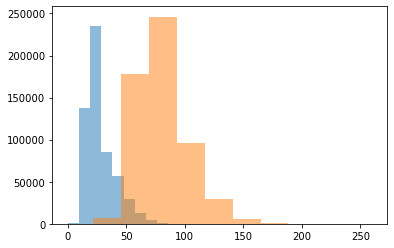

In [15]:
plt.hist(bench_data['Age'],alpha=0.5);
plt.hist(bench_data['BodyweightKg'],alpha=0.5);

Before we begin we should make a train-test split

In [22]:
# First let's save Wilks points for later
wilks = bench_data["Wilks"]

# Separate Input and output
X = bench_data.drop(columns=["Wilks","BestBenchKg"])
y = bench_data['BestBenchKg']

# Make train-test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [23]:
# Make a model based on our training data
reg = LinearRegression().fit(x_train,y_train)

# Make predictions on the test data
predictions = reg.predict(x_test)

x_test['Predictions'] = predictions
x_test['Actual Bench'] = y_test
x_test

,F,M,Mx,Raw,Single-ply,Wraps,Age,BodyweightKg,Predictions,Actual Bench
0,1.0,0.0,0.0,1.0,0.0,0.0,19.5,72.75,65.113281,65.0
1,0.0,1.0,0.0,1.0,0.0,0.0,53.5,88.90,131.948242,145.0
2,0.0,1.0,0.0,1.0,0.0,0.0,38.5,65.65,103.738281,127.5
3,0.0,1.0,0.0,1.0,0.0,0.0,24.5,72.80,110.182617,100.0
4,0.0,1.0,0.0,1.0,0.0,0.0,26.5,82.50,121.441895,160.0
...,...,...,...,...,...,...,...,...,...,...
84552,0.0,1.0,0.0,0.0,1.0,0.0,18.0,135.70,203.325195,190.0
84553,0.0,1.0,0.0,1.0,0.0,0.0,28.0,109.55,152.350586,165.0
84554,1.0,0.0,0.0,1.0,0.0,0.0,41.5,55.06,47.653809,60.0
84555,1.0,0.0,0.0,0.0,1.0,0.0,20.5,69.60,84.120605,50.0


# Error is okay! (It's the point actually)
The predictions are not perfect, as outlined by some of the previous assumptions/shortcuts we made. It's also inevitable given how much variability exists in this context. But they seem to be pretty good. If we look above, we see that the predictions are good ballparks.<br>
Before I started this I thought that it wouldn't be okay if the predictions weren't perfect. Above we see a prediction that was almost 40kg off! But this is kind of the point. <br>
The whole reason we want a prediction is to measure how good/bad the actual lift was! <br>
The prediction is how the analysis thinks a lifter should perform on average. If your actual press was lower, that means you either underperformed or didn't push hard enough. <br>
Back on the topic of steroids again! If a lifter's numbers are WAY higher than they are expected to be on average, this could be a good way to tell if they are on steroids!

Given the training data below, let's see how we would use this model.

In [18]:
display(squat_data)
display(bench_data)
display(deadlift_data)

,F,M,Mx,Raw,Single-ply,Wraps,Age,BodyweightKg,Wilks,BestSquatKg
0,1.0,0.0,0.0,0.0,1.0,0.0,39.5,51.90,390.15,110.5
1,1.0,0.0,0.0,0.0,1.0,0.0,30.5,50.64,470.74,127.5
2,1.0,0.0,0.0,0.0,1.0,0.0,31.5,55.76,401.40,115.0
3,1.0,0.0,0.0,0.0,1.0,0.0,31.5,56.42,374.31,117.5
4,1.0,0.0,0.0,0.0,1.0,0.0,27.0,67.14,438.00,150.0
...,...,...,...,...,...,...,...,...,...,...
563702,1.0,0.0,0.0,0.0,1.0,0.0,32.0,95.00,548.04,260.0
563703,1.0,0.0,0.0,0.0,1.0,0.0,45.0,109.30,525.14,242.5
563704,1.0,0.0,0.0,0.0,1.0,0.0,27.5,113.22,511.26,237.5
563705,1.0,0.0,0.0,0.0,1.0,0.0,37.5,110.79,501.32,227.5


,F,M,Mx,Raw,Single-ply,Wraps,Age,BodyweightKg,Wilks,BestBenchKg
0,1.0,0.0,0.0,0.0,1.0,0.0,39.5,51.90,390.15,72.5
1,1.0,0.0,0.0,0.0,1.0,0.0,30.5,50.64,470.74,90.0
2,1.0,0.0,0.0,0.0,1.0,0.0,31.5,55.76,401.40,87.5
3,1.0,0.0,0.0,0.0,1.0,0.0,31.5,56.42,374.31,62.5
4,1.0,0.0,0.0,0.0,1.0,0.0,27.0,67.14,438.00,108.0
...,...,...,...,...,...,...,...,...,...,...
563702,1.0,0.0,0.0,0.0,1.0,0.0,32.0,95.00,548.04,160.0
563703,1.0,0.0,0.0,0.0,1.0,0.0,45.0,109.30,525.14,187.5
563704,1.0,0.0,0.0,0.0,1.0,0.0,27.5,113.22,511.26,195.0
563705,1.0,0.0,0.0,0.0,1.0,0.0,37.5,110.79,501.32,200.0


,F,M,Mx,Raw,Single-ply,Wraps,Age,BodyweightKg,Wilks,BestDLKg
0,1.0,0.0,0.0,0.0,1.0,0.0,39.5,51.90,390.15,130.0
1,1.0,0.0,0.0,0.0,1.0,0.0,30.5,50.64,470.74,152.5
2,1.0,0.0,0.0,0.0,1.0,0.0,31.5,55.76,401.40,137.5
3,1.0,0.0,0.0,0.0,1.0,0.0,31.5,56.42,374.31,140.0
4,1.0,0.0,0.0,0.0,1.0,0.0,27.0,67.14,438.00,170.0
...,...,...,...,...,...,...,...,...,...,...
563702,1.0,0.0,0.0,0.0,1.0,0.0,32.0,95.00,548.04,227.5
563703,1.0,0.0,0.0,0.0,1.0,0.0,45.0,109.30,525.14,215.0
563704,1.0,0.0,0.0,0.0,1.0,0.0,27.5,113.22,511.26,200.0
563705,1.0,0.0,0.0,0.0,1.0,0.0,37.5,110.79,501.32,190.0


In [19]:
# Make a model for each lift
X = squat_data.drop(columns=['Wilks','BestSquatKg'])
y = squat_data['BestSquatKg']
squatModel = LinearRegression().fit(X,y)

X = bench_data.drop(columns=['Wilks','BestBenchKg'])
y = bench_data['BestBenchKg']
benchModel = LinearRegression().fit(X,y)

X = deadlift_data.drop(columns=['Wilks','BestDLKg'])
y = deadlift_data['BestDLKg']
deadliftModel = LinearRegression().fit(X,y)

## EXAMPLE USE
Say we have a new lifter. They identify as female, are 25 years old, 63 kg (~140 lbs), and choose to not use any lifting equipment. We will represent this lifter as below.

In [20]:
lifter1 = pd.DataFrame([1.0,0.0,0.0,1.0,0.0,0.0,25.0,63.0]).transpose()

# Make predictions for each lift
predicted_squat = squatModel.predict(lifter1)[0]
predicted_bench = benchModel.predict(lifter1)[0]
predicted_deadlift = deadliftModel.predict(lifter1)[0]

predictions = pd.DataFrame(data={'redicted_squat':[predicted_squat],
                                 'bredicted_bench':[predicted_bench],
                                 'predicted_deadlift':[predicted_deadlift]})
predictions

,redicted_squat,bredicted_bench,predicted_deadlift
0,99.891174,54.684998,125.28624


This model predicts that our example lifter should squat around 100kg, bench around 54kg, and deadlift around 125kg. Some solid numbers for a 63kg lifter!<br>
The idea of this model is that once we measure their actual lift, we now have a decent way of figuring out how impressive the lift was.<br>
Let's try another example to illustrat this idea. <br><br>

This time we will use a male lifter, 30 years old, 150 kg (~330 lbs) and is using a full single-ply suit.

In [21]:
lifter2 = pd.DataFrame([0.0,1.0,0.0,0.0,1.0,0.0,30.0,150.0]).transpose()

# Make predictions for each lift
predicted_squat = squatModel.predict(lifter2)[0]
predicted_bench = benchModel.predict(lifter2)[0]
predicted_deadlift = deadliftModel.predict(lifter2)[0]

predictions = pd.DataFrame(data={'redicted_squat':[predicted_squat],
                                 'bredicted_bench':[predicted_bench],
                                 'predicted_deadlift':[predicted_deadlift]})
predictions

,redicted_squat,bredicted_bench,predicted_deadlift
0,326.422028,220.979248,311.891022


These are massive numbers! So, let's say this lifter is able to bench 120kg (264 lbs). That is by all means a very heavy bench press. But we can see that it is not as impressive given the lifter's size. This lifter is HUGE! Of course they should be benching a lot! What this says is that a goliath of a man like lifter2 walks into a meet and benches 265 pounds, they are not really trying too hard. Yes, this is an obvious example, but what if it isn't so obvious, then this method of assessing how impressive a lift was could come in handy. <br>
The alternative is true as well. Say they benched 400kg. It isn't fully clear how impressive this is if we just had the bench press number alone. We would just think, "Oh that's a big guy pressing very large weight." Then we would notice that on average, they should only be able to bench about 220kg. They almost DOUBLED the average! We know are able to quantify just exactly how impressive this person is!<br><br>
You think lifter2 uses roids?🤔